In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/kk/jupyter/jupyter_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kk/jupyter/jupyter_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kk/jupyter/jupyter_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kk/jupyter/jupyter_env/lib/pytho

In [3]:
df1 = pd.read_csv('data/MovementAAL/dataset/MovementAAL_RSS_1.csv')
df2 = pd.read_csv('data/MovementAAL/dataset/MovementAAL_RSS_2.csv')

In [4]:
df1.head()

,#RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
0,-0.90476,-0.48,0.28571,0.30
1,-0.57143,-0.32,0.14286,0.30
2,-0.38095,-0.28,-0.14286,0.35
3,-0.28571,-0.20,-0.47619,0.35
4,-0.14286,-0.20,0.14286,-0.20


In [5]:
path = 'data/MovementAAL/dataset/MovementAAL_RSS_'
sequences = list()
for i in range(1, 315):
    file_path = path + str(i) + '.csv'
    print(file_path)
    df = pd.read_csv(file_path, header=0)
    values = df.values
    sequences.append(values)

data/MovementAAL/dataset/MovementAAL_RSS_1.csv
data/MovementAAL/dataset/MovementAAL_RSS_2.csv
data/MovementAAL/dataset/MovementAAL_RSS_3.csv
data/MovementAAL/dataset/MovementAAL_RSS_4.csv
data/MovementAAL/dataset/MovementAAL_RSS_5.csv
data/MovementAAL/dataset/MovementAAL_RSS_6.csv
data/MovementAAL/dataset/MovementAAL_RSS_7.csv
data/MovementAAL/dataset/MovementAAL_RSS_8.csv
data/MovementAAL/dataset/MovementAAL_RSS_9.csv
data/MovementAAL/dataset/MovementAAL_RSS_10.csv
data/MovementAAL/dataset/MovementAAL_RSS_11.csv
data/MovementAAL/dataset/MovementAAL_RSS_12.csv
data/MovementAAL/dataset/MovementAAL_RSS_13.csv
data/MovementAAL/dataset/MovementAAL_RSS_14.csv
data/MovementAAL/dataset/MovementAAL_RSS_15.csv
data/MovementAAL/dataset/MovementAAL_RSS_16.csv
data/MovementAAL/dataset/MovementAAL_RSS_17.csv
data/MovementAAL/dataset/MovementAAL_RSS_18.csv
data/MovementAAL/dataset/MovementAAL_RSS_19.csv
data/MovementAAL/dataset/MovementAAL_RSS_20.csv
data/MovementAAL/dataset/MovementAAL_RSS_21.csv
d

In [6]:
targets = pd.read_csv('data/MovementAAL/dataset/MovementAAL_target.csv')
targets = targets.values[:,1]
targets

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [7]:
sequences[0]

array([[-0.90476 , -0.48    ,  0.28571 ,  0.3     ],
       [-0.57143 , -0.32    ,  0.14286 ,  0.3     ],
       [-0.38095 , -0.28    , -0.14286 ,  0.35    ],
       [-0.28571 , -0.2     , -0.47619 ,  0.35    ],
       [-0.14286 , -0.2     ,  0.14286 , -0.2     ],
       [-0.14286 , -0.2     ,  0.047619,  0.      ],
       [-0.14286 , -0.16    , -0.38095 ,  0.2     ],
       [-0.14286 , -0.04    , -0.61905 , -0.2     ],
       [-0.095238, -0.08    ,  0.14286 , -0.55    ],
       [-0.047619,  0.04    , -0.095238,  0.05    ],
       [-0.19048 , -0.04    ,  0.095238,  0.4     ],
       [-0.095238, -0.04    , -0.14286 ,  0.35    ],
       [-0.33333 , -0.08    , -0.28571 , -0.2     ],
       [-0.2381  ,  0.04    ,  0.14286 ,  0.35    ],
       [ 0.      ,  0.08    ,  0.14286 ,  0.05    ],
       [-0.095238,  0.04    ,  0.095238,  0.1     ],
       [-0.14286 , -0.2     ,  0.14286 ,  0.5     ],
       [-0.19048 ,  0.04    , -0.42857 ,  0.3     ],
       [-0.14286 , -0.08    , -0.2381  ,  0.15

In [8]:
groups = pd.read_csv('data/MovementAAL/groups/MovementAAL_DatasetGroup.csv', header=0)
groups = groups.values[:,1]
groups

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [9]:
len_sequences = []
for one_seq in sequences:
    len_sequences.append(len(one_seq))
pd.Series(len_sequences).describe()

count    314.000000
mean      42.028662
std       16.185303
min       19.000000
25%       26.000000
50%       41.000000
75%       56.000000
max      129.000000
dtype: float64

In [10]:
# 用最長序列的最後一行的數據填充較短的序列
to_pad = 129
new_seq = []
for one_seq in sequences:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
    to_concat = np.repeat(one_seq[-1], n).reshape(4, n).transpose()
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)
final_seq = np.stack(new_seq)

# 截斷較長的序列
from keras.preprocessing import sequence
seq_len = 60
final_seq=sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')

In [11]:
train = [final_seq[i] for i in range(len(groups)) if (groups[i]==2)]
validation = [final_seq[i] for i in range(len(groups)) if groups[i]==1]
test = [final_seq[i] for i in range(len(groups)) if groups[i]==3]

train_target = [targets[i] for i in range(len(groups)) if (groups[i]==2)]
validation_target = [targets[i] for i in range(len(groups)) if groups[i]==1]

test_target = [targets[i] for i in range(len(groups)) if groups[i]==3]
train = np.array(train)
validation = np.array(validation)
test = np.array(test)

In [12]:
train_target = np.array(train_target)
train_target = (train_target+1)/2

validation_target = np.array(validation_target)
validation_target = (validation_target+1)/2

test_target = np.array(test_target)
test_target = (test_target+1)/2

In [13]:
train

array([[[ 0.066667,  0.38462 , -1.      , -0.61905 ],
        [ 0.066667,  0.33333 , -0.77273 , -0.61905 ],
        [ 0.066667,  0.38462 , -0.72727 , -0.61905 ],
        ...,
        [ 0.066667, -0.17949 , -0.36364 , -0.14286 ],
        [ 0.066667, -0.17949 , -0.36364 , -0.14286 ],
        [ 0.066667, -0.17949 , -0.36364 , -0.14286 ]],

       [[ 0.33333 , -0.12821 ,  0.22727 ,  0.28571 ],
        [ 0.066667, -0.23077 ,  0.22727 ,  0.28571 ],
        [ 0.2     , -0.076923,  0.045455,  0.28571 ],
        ...,
        [ 1.      ,  0.84615 , -0.81818 , -0.7619  ],
        [ 1.      ,  0.84615 , -0.81818 , -0.7619  ],
        [ 1.      ,  0.84615 , -0.81818 , -0.7619  ]],

       [[ 0.2     , -0.48718 ,  0.090909,  0.2381  ],
        [ 0.42222 , -0.69231 , -0.95455 ,  0.2381  ],
        [ 0.42222 , -0.23077 , -0.18182 ,  0.      ],
        ...,
        [ 0.73333 ,  0.53846 , -0.90909 , -0.57143 ],
        [ 0.73333 ,  0.53846 , -0.90909 , -0.57143 ],
        [ 0.73333 ,  0.53846 , -0.90909

In [35]:
model = Sequential()
model.add(LSTM(256, input_shape=(seq_len, 4)))
# model.add(Dense(64, input_shape=(seq_len, 4)))
# model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 256)               267264    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 267,521
Trainable params: 267,521
Non-trainable params: 0
_________________________________________________________________


In [52]:
model = Sequential()
# model.add(Embedding(10, output_dim=256, input_length=seq_len))
model.add(LSTM(128, input_shape=(seq_len, 4), return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 60, 128)           68096     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 128)           0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 199,809
Trainable params: 199,809
Non-trainable params: 0
_________________________________________________________________


In [45]:
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (seq_len, 4)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            11000     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
__________

In [53]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
trainHistory = model.fit(train, train_target, epochs=200, batch_size=20, callbacks=[chk], validation_data=(validation, validation_target))

Train on 106 samples, validate on 104 samples
Epoch 1/200
106/106 [==============================] - 5s 43ms/step - loss: 0.6950 - acc: 0.4906 - val_loss: 0.6723 - val_acc: 0.5288

Epoch 00001: val_acc improved from -inf to 0.52885, saving model to best_model.pkl
Epoch 2/200
106/106 [==============================] - 1s 9ms/step - loss: 0.6842 - acc: 0.5094 - val_loss: 0.6504 - val_acc: 0.6442

Epoch 00002: val_acc improved from 0.52885 to 0.64423, saving model to best_model.pkl
Epoch 3/200
106/106 [==============================] - 1s 10ms/step - loss: 0.6438 - acc: 0.6415 - val_loss: 0.6518 - val_acc: 0.5769

Epoch 00003: val_acc did not improve from 0.64423
Epoch 4/200
106/106 [==============================] - 1s 10ms/step - loss: 0.6163 - acc: 0.6981 - val_loss: 0.7135 - val_acc: 0.6058

Epoch 00004: val_acc did not improve from 0.64423
Epoch 5/200
106/106 [==============================] - 1s 10ms/step - loss: 0.5263 - acc: 0.7547 - val_loss: 1.5176 - val_acc: 0.5673

Epoch 00005

In [18]:
def show_trainHistory(train,validation): # 建立show_trainHistory函數，顯示CNN模型訓練過程線性圖
    plt.plot(trainHistory.history[train]) # 印出train(訓練)線
    plt.plot(trainHistory.history[validation]) # 印出validation線
    plt.title(train) # 顯示圖的標題
    plt.ylabel(train) # 顯示Y軸的標籤
    plt.xlabel('times') # 顯示Y軸的標籤為「times」
    plt.legend(['train','validation'],loc='upper left') # 顯示圖列(train 和 validation)在左上角
    plt.show() # 顯示圖表

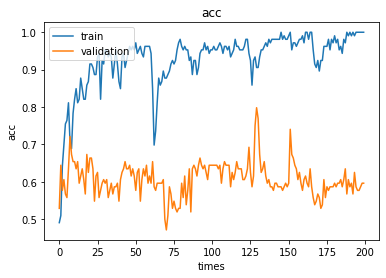

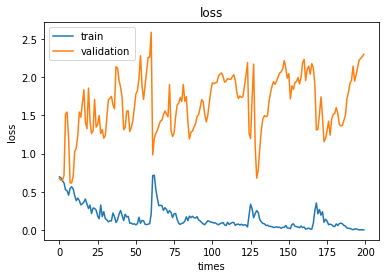

In [54]:
show_trainHistory('acc','val_acc')
show_trainHistory('loss','val_loss')

In [20]:
scores = model.evaluate(test, test_target)
print("test loss: ", scores[0], "\ntest accuracy: ", scores[1])

104/104 [==============================] - 0s 2ms/step
test loss:  2.1106700238126974 
test accuracy:  0.5192307692307693


In [21]:
model.save('model.h5')

In [22]:
prediction = model.predict_classes(test)
for i, pred in enumerate(prediction):
    ret = 'True' if pred else 'False'
    print(f'{i + 1}. {ret} ', end='\t')

1. True 	2. True 	3. True 	4. False 	5. False 	6. False 	7. True 	8. True 	9. False 	10. False 	11. True 	12. True 	13. False 	14. True 	15. True 	16. True 	17. False 	18. True 	19. True 	20. False 	21. True 	22. True 	23. True 	24. False 	25. False 	26. True 	27. True 	28. False 	29. True 	30. True 	31. True 	32. True 	33. True 	34. False 	35. True 	36. True 	37. True 	38. True 	39. True 	40. False 	41. False 	42. False 	43. True 	44. False 	45. True 	46. False 	47. False 	48. False 	49. False 	50. False 	51. False 	52. False 	53. False 	54. False 	55. False 	56. True 	57. False 	58. False 	59. True 	60. True 	61. True 	62. False 	63. False 	64. False 	65. True 	66. True 	67. False 	68. True 	69. False 	70. False 	71. True 	72. True 	73. True 	74. True 	75. True 	76. True 	77. True 	78. True 	79. True 	80. True 	81. False 	82. True 	83. True 	84. True 	85. True 	86. False 	87. True 	88. True 	89. True 	90. False 	91. True 	92. False 	93. True 	94. False 	95. False 	96. False 	97. Fals

In [23]:
lmodel = load_model('model.h5')

In [24]:
prediction = lmodel.predict_classes(test)
for i, pred in enumerate(prediction):
    ret = 'True' if pred else 'False'
    print(f'{i + 1}. {ret} ', end='\t')

1. True 	2. True 	3. True 	4. False 	5. False 	6. False 	7. True 	8. True 	9. False 	10. False 	11. True 	12. True 	13. False 	14. True 	15. True 	16. True 	17. False 	18. True 	19. True 	20. False 	21. True 	22. True 	23. True 	24. False 	25. False 	26. True 	27. True 	28. False 	29. True 	30. True 	31. True 	32. True 	33. True 	34. False 	35. True 	36. True 	37. True 	38. True 	39. True 	40. False 	41. False 	42. False 	43. True 	44. False 	45. True 	46. False 	47. False 	48. False 	49. False 	50. False 	51. False 	52. False 	53. False 	54. False 	55. False 	56. True 	57. False 	58. False 	59. True 	60. True 	61. True 	62. False 	63. False 	64. False 	65. True 	66. True 	67. False 	68. True 	69. False 	70. False 	71. True 	72. True 	73. True 	74. True 	75. True 	76. True 	77. True 	78. True 	79. True 	80. True 	81. False 	82. True 	83. True 	84. True 	85. True 	86. False 	87. True 	88. True 	89. True 	90. False 	91. True 	92. False 	93. True 	94. False 	95. False 	96. False 	97. Fals